Python implementation of a Feedforward Neural Network utilizing gradient descent and backpropagation for training

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [34]:
class FFN_net:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.w1 = np.random.randn(input_dim,hidden_dim) # input_dim*hidden_dim
        self.b1 = np.zeros(hidden_dim)
        self.w2 = np.random.randn(hidden_dim, output_dim)
        self.b2 = np.zeros(output_dim)
        
    def predict(self,X):
        z1 = np.dot(X, self.w1)+self.b1 
        a1 = np.maximum(0,z1)# ReLu activation function
        z2 = np.dot(a1, self.w2)+self.b2
        exp_z = np.exp(z2)
        probs = exp_z/np.sum(exp_z, axis = 1, keepdims = True)
        return probs
        
    def train(self, X, y, epochs, lr = 0.01):
        #forward
        for _ in range(epochs):
            z1 = np.dot(X, self.w1)+self.b1
            a1 = np.maximum(0,z1)# ReLu activation function
            z2 = np.dot(a1, self.w2)+self.b2
            exp_z = np.exp(z2)
            probs = exp_z/np.sum(exp_z, axis = 1, keepdims = True)
            #print(probs)
            
            #back_propagation
            delta3 = probs
            delta3[range(len(X)),y]-=1
            dw2 = np.dot(a1.T,delta3)
            db2 = np.sum(delta3, axis = 0)
            delta2 = np.dot(delta3, self.w2.T)*(a1>0)
            dw1 = np.dot(X.T,delta2)
            db1 = np.sum(delta2, axis = 0)
            
            self.w1-= lr*dw1
            self.w2-= lr*dw2
            self.b1-= lr*db1
            self.b2-= lr*db2      

In [35]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Initialize a neural network
net = FFN_net(input_dim=2, hidden_dim=10, output_dim=2)

# Train the neural network
probs = net.train(X, y, epochs=100)
probs = net.predict(X)
print(probs)
predictions = np.argmax(probs, axis=1)
print(predictions)

[[0.64055369 0.35944631]
 [0.37208717 0.62791283]
 [0.3512036  0.6487964 ]
 [0.61036874 0.38963126]]
[0 1 1 0]


Implementation of a Feedforward Neural Network using PyTorch

In [85]:
class FF_net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FF_net, self).__init__()
        self.layer1 = nn.Linear(input_dim,hidden_dim, dtype = torch.float)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_dim, output_dim, dtype = torch.float)
    def forward(self, X):
        return self.layer2(self.relu(self.layer1(X)))

tensor([0, 1, 1, 0])


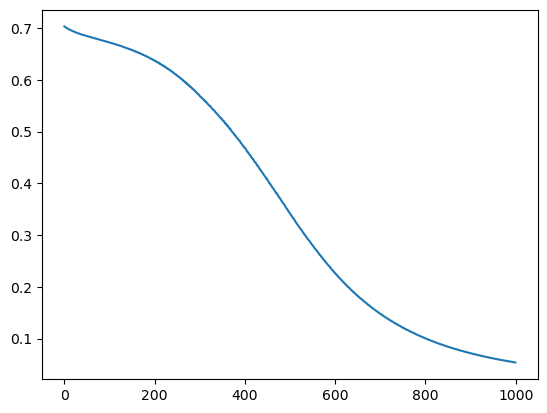

In [86]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[1,0],[0,1],[0,1], [1,0]])

x_t = torch.tensor(X, dtype = torch.float)
y_t = torch.tensor(y, dtype = torch.float)

model = FF_net(2,10,2)
loss_fn = nn.BCELoss()
optimiser = torch.optim.SGD(model.parameters(), lr = 0.1)

no_of_epochs = 1000

def probs_predict(y_predict):
    m = y_predict.shape[0]
    y_binary = []
    for i in range(m):
        y_binary.append(torch.argmax(y_predict[i]).item())
    return torch.tensor(y_binary)

all_losses = []
for _ in range(no_of_epochs):
    y_pedict = model(x_t).squeeze()
    output_probs = torch.sigmoid(y_pedict)
    #print(output_probs)
    loss = loss_fn(output_probs, y_t)
    all_losses.append(loss.detach().numpy())
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

y_predict = probs_predict(torch.sigmoid(model(x_t)))
print(y_predict)
plt.plot(all_losses)
    